# CURSO DE ESTATÍSTICA - PARTE 4
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# DATASET DO PROJETO
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### **Sugestões: pandas, numpy, scipy, statsmodels**

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset

In [3]:
dados = pd.read_csv('dados_projeto.csv', sep= ';')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [5]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

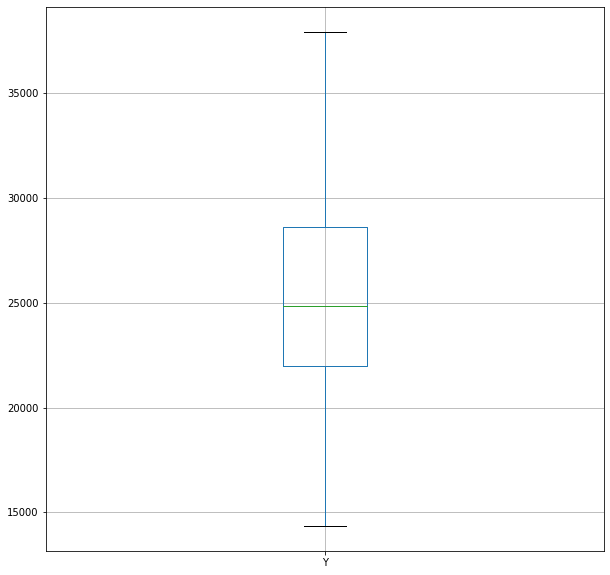

In [7]:
dados.boxplot(column=['Y'], figsize = (10,10))

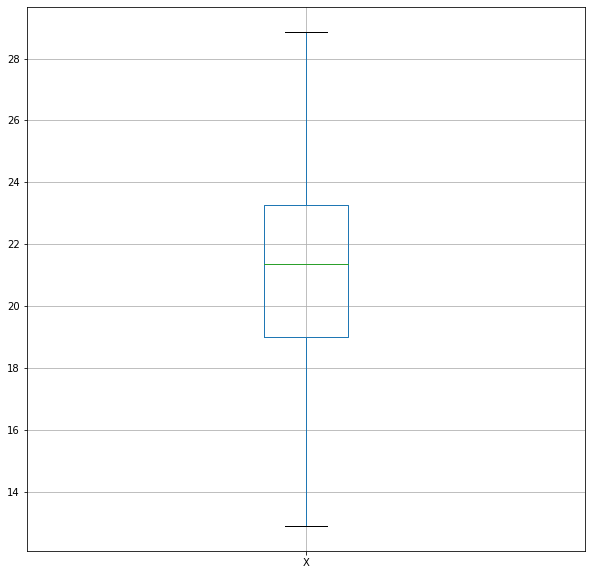

In [8]:
dados.boxplot(column=['X'], figsize = (10,10))

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### **Utilizando o método gráfico**

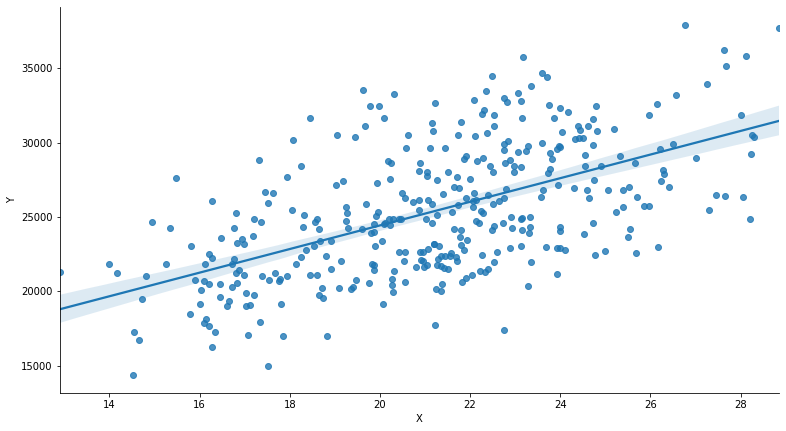

In [9]:
ax = sns.lmplot(x ='X', y='Y', data=dados)
ax.fig.set_size_inches(12, 6)
ax

### **Utilizando a matriz de correlação**

In [10]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: SIM

É possível quantificar a intensidade dessa relação?

Resp.: SIM

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: NÃO

### Prepare os dados para estimar um modelo de regressão linear simples

In [11]:
Y = dados.Y
X = sm.add_constant(dados.X)


### Estime o modelo de regressão linear simples

In [12]:
regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [13]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.87e-33
Time:                        21:40:25   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [14]:
dados['Y_previsto'] = regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [15]:
regressao.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [16]:
regressao.resid

0     -4768.200544
1     -1034.633434
2      2556.108148
3      2208.809479
4      1436.990685
          ...     
360    4700.911828
361    -430.047922
362   -3452.960686
363   -5056.495925
364   -5764.198900
Length: 365, dtype: float64

### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


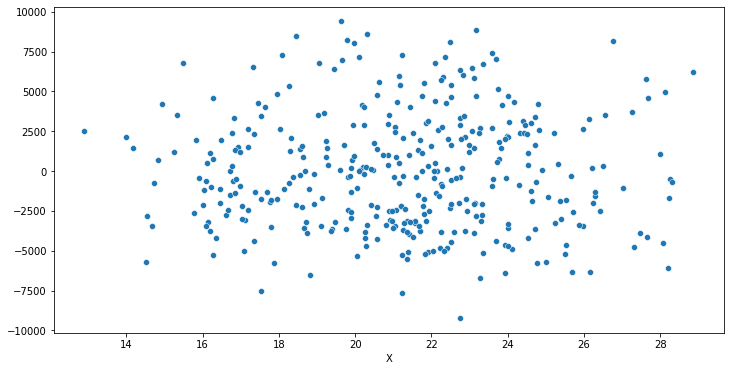

In [17]:
ax = sns.scatterplot(dados.X, regressao.resid)
ax.figure.set_size_inches(12, 6)
ax

### Obtenha o QQPlot dos resíduos

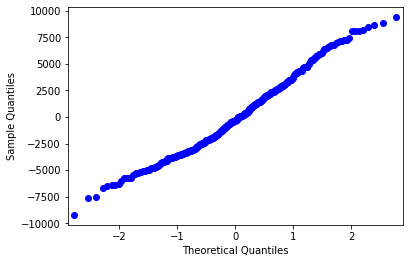

In [20]:
fig = sm.qqplot(regressao.resid)

### **A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?**

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [26]:
SQE = regressao.ssr
SQE

4718394688.067693

In [27]:
SQR = regressao.ess
SQR

2325899486.7377863

In [28]:
SQT = SQR + SQE
SQT

7044294174.805479

In [29]:
R2 = SQR / SQT
R2

0.33018204933243206

In [30]:
regressao.rsquared

0.330182049332432